#**Imports**#

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

import scipy
from scipy import linalg
from scipy.interpolate import griddata

from PIL import Image

import cv2

import urllib.request

#**Note**#

Images used for the exercises 2 and 4 can be obtained through the following url.

In [ ]:
urllib.request.urlretrieve(
  'https://i.postimg.cc/Y9T9zzNR/tiles.png',
   "tiles.png")

urllib.request.urlretrieve(
  'https://i.postimg.cc/RVSrbnPL/planes.png',
   "planes.png");

#**Exercise 1**#

1. Construct three collinear points $x_{1}$, $x_{2}$, $x_{3}$ and show they are on a line $l$.

***Def***:  Three or more points that lie on the same line are **collinear points**.

In the projective plane $\mathbb{P^2}$ two distinct points lie on a single line. So, let's first choose two points $x_{1}$ and $x_{2}$ in their **inhomogeneous** (and normalized w.r.t. last coordinate) coordinates.

In [ ]:
# 10 is chosen as an upper bound just for convenience of operations with small numbers
# chosen seed does not generate coordinates of origin
np.random.seed(103)
x1 = np.random.randint(10, size = 3) 
x1 = x1 // x1[-1]
x2 = np.random.randint(10, size = 3)
x2 = x2 // x2[-1]
print(f"\n x1: {x1}, \n x2: {x2}")


 x1: [2 3 1], 
 x2: [9 6 1]


Given $x_{1}$ and $x_{2}$, we can define a line $l$ as a **cross-product:** $l = x_{1} \times x_{2}$.

In [ ]:
l = np.cross(x1, x2)
print(f"\n l: {l}")


 l: [ -3   7 -15]


Now we can find a point $x_{3}$ as a point that lies on a line $l$.

***Def***: The point $x$ lies on the line $l$ if and only if $x^Tl = 0$.

Therefore, we can choose any $x_{3}$ that satisfies to $x_{3}^Tl = 0$.

In [ ]:
# let's choose, for example
x3 = np.array([-5, 0, 1])
print(f"\n x3: {x3}")
# verify that x3 belongs to l (P.S. transposition is made automatically)
result = np.inner(x3, l)
print(f"\n Belonging x3 to l: {result==0}")


 x3: [-5  0  1]

 Belonging x3 to l: True


So, it is shown by construction that points $x_{1}$, $x_{2}$ and $x_{3}$ belong to a line $l$.

In [ ]:
print(f"\n x1: {x1}, \n x2: {x2}, \n x3: {x3}, \n\n l: {l}, \
\n\n Belonging x1 to l: {np.inner(x1, l)==0}, \n Belonging x2 to l: {np.inner(x2, l)==0}, \n Belonging x3 to l: {result==0}")


 x1: [2 3 1], 
 x2: [9 6 1], 
 x3: [-5  0  1], 

 l: [ -3   7 -15], 

 Belonging x1 to l: True, 
 Belonging x2 to l: True, 
 Belonging x3 to l: True


2. Show that if $H$ is a projective point trasformation, then the transformation applied to the points $x_{1}$, $x_{2}$ and $x_{3}$ and suitably to the line $l$ maps the points into points $x_{1}^{'}$, $x_{2}^{'}$ and $x_{3}^{'}$ and the line into the line $l^{'}$ such that $x_{1}^{'}$, $x_{2}^{'}$ and $x_{3}^{'}$ are on  $l^{'}$.

***Th***: A mapping $h : \mathbb{P^2}  → \mathbb{P^2}$  is a projectivity if and only if there exists a non-singular $3 \times 3$ matrix $H$ such that for any point in $\mathbb{P^2}$ represented by a vector $x$ it is true that $h(x) = Hx$.

Therefore, we need to define $3 \times 3$ matrix $H$. 

To be a projective transformation $H$ is required be non-singular. 

Thus, let's generate a random $3 \times 3$ matrix and verify that it has an **inverse** (if we obtain $H^{-1}$ then original matrix $H$ is non-singular).

In [ ]:
H = np.random.randint(10, size = (3, 3)) 
H_inv = np.linalg.inv(H)
print(f"\n H: \n {H}, \n\n Inverse of H: \n {H_inv}")


 H: 
 [[5 2 8]
 [3 6 4]
 [7 6 8]], 

 Inverse of H: 
 [[-0.375  -0.5     0.625 ]
 [-0.0625  0.25   -0.0625]
 [ 0.375   0.25   -0.375 ]]


Now we can multiply obtained non-singular matrix $H$ on the points $x_{1}$, $x_{2}$ and $x_{3}$ and obtain three new points $x_{1}^{'}$, $x_{2}^{'}$ and $x_{3}^{'}$, and we have to verify that these new points are all on a line.

First, first let's build the matrix $X$ that collects points $x_{1}$, $x_{2}$ and $x_{3}$ as columns.

In [ ]:
X = np.transpose(np.array([x1, x2, x3]))
print(f"\n x1: {x1}, \n x2: {x2}, \n x3: {x3}, \n\n X: \n {X}")


 x1: [2 3 1], 
 x2: [9 6 1], 
 x3: [-5  0  1], 

 X: 
 [[ 2  9 -5]
 [ 3  6  0]
 [ 1  1  1]]


Then, we need to perform multiplication $X^{'} = HX$ to obtain $x_{1}^{'}$, $x_{2}^{'}$ and $x_{3}^{'}$.

In [ ]:
X_new = np.matmul(H,X)
x1_new = X_new[:, 0]
x2_new = X_new[:, 1]
x3_new = X_new[:, 2]
print(f"\n H: \n {H} \n\n X: \n {X} \n\n X': \n {X_new} \n\n x1': {x1_new}, \n x2': {x2_new}, \n x3': {x3_new}")


 H: 
 [[5 2 8]
 [3 6 4]
 [7 6 8]] 

 X: 
 [[ 2  9 -5]
 [ 3  6  0]
 [ 1  1  1]] 

 X': 
 [[ 24  65 -17]
 [ 28  67 -11]
 [ 40 107 -27]] 

 x1': [24 28 40], 
 x2': [ 65  67 107], 
 x3': [-17 -11 -27]


We have to check that $x_{1}^{'}$, $x_{2}^{'}$ and $x_{3}^{'}$ are on the same line $l^{'}$.

Let's find this line: $l^{'} = x_{1}^{'} \times x_{2}^{'}$.

In [ ]:
l_new = np.cross(x1_new, x2_new)
print(f"\n x1': {x1_new}, \n x2': {x2_new} \n\n l' obtained through the cross-product x1' and x2': {l_new} \
\n l' obtained through the cross-product x1' and x2' and normalized wrt last coordinate: {np.round(l_new/l_new[-1], 2)}")


 x1': [24 28 40], 
 x2': [ 65  67 107] 

 l' obtained through the cross-product x1' and x2': [ 316   32 -212] 
 l' obtained through the cross-product x1' and x2' and normalized wrt last coordinate: [-1.49 -0.15  1.  ]


Now we have to check wether $x_{3}^{'}$ belongs to the same line and if we get the same line through the cross-products $x_{2}^{'} \times x_{3}^{'}$ and $x_{1}^{'} \times x_{3}^{'}$.

Let's first do cross-products.

In [ ]:
l_new_2 = np.cross(x2_new, x3_new)
print(f"\n x2': {x2_new}, \n x3': {x3_new} \n\n l' obtained through the cross-product x2' and x3': {l_new_2} \
\n l' obtained through the cross-product x2' and x3' and normalized wrt last coordinate: {np.round(l_new_2/l_new_2[-1], 2)}")

l_new_3 = np.cross(x1_new, x3_new)
print(f"\n x1': {x1_new}, \n x3': {x3_new} \n\n l' obtained through the cross-product x1' and x3': {l_new_3} \
\n l' obtained through the cross-product x1' and x3' and normalized wrt last coordinate: {np.round(l_new_3/l_new_3[-1], 2)}")


 x2': [ 65  67 107], 
 x3': [-17 -11 -27] 

 l' obtained through the cross-product x2' and x3': [-632  -64  424] 
 l' obtained through the cross-product x2' and x3' and normalized wrt last coordinate: [-1.49 -0.15  1.  ]

 x1': [24 28 40], 
 x3': [-17 -11 -27] 

 l' obtained through the cross-product x1' and x3': [-316  -32  212] 
 l' obtained through the cross-product x1' and x3' and normalized wrt last coordinate: [-1.49 -0.15  1.  ]


We can see that obtained lines are the same as $l^{'}$ up to **scaling factor** (which is **irrelevant**).

Now, we have to verify that $x_{1}^{'}$, $x_{2}^{'}$ and $x_{3}^{'}$ lie exactly on this line $l^{'}$: $x_{1}^{'T}l^{'} = x_{2}^{'T}l^{'} = x_{3}^{'T}l^{'} = 0$.

In [ ]:
print(f"\n x1': {x1_new}, \n x2': {x2_new}, \n x3': {x3_new}, \n\n l': {l_new}, \
\n \
\n Belonging x1' to l': {np.inner(x1_new, l_new)==0}, \
\n Belonging x2' to l': {np.inner(x2_new, l_new)==0}, \
\n Belonging x3' to l': {np.inner(x3_new, l_new)==0}")


 x1': [24 28 40], 
 x2': [ 65  67 107], 
 x3': [-17 -11 -27], 

 l': [ 316   32 -212], 
 
 Belonging x1' to l': True, 
 Belonging x2' to l': True, 
 Belonging x3' to l': True


We have checked that three points that lie on a line will be mapped to the three points that lie on a line whenever we apply projectivity (any non-singular matrix $H$).

Now we can infere theoretical proof of a theorem written above.

Since points $x_{1}$, $x_{2}$ and $x_{3}$ lie on a line $l$ it follows that $l^{T}x_{i} = 0$ for $i = 1,2,3$. Matrix $H$ is non-singular, so, it has an inverse and $H^{-1}H = I$. Therefore, $l^{T}H^{-1}Hx_{i} = 0$, and points $x^{'}_{i} = Hx_{i}$ all lie on a line $(l^{T}H^{-1})^{T} = H^{-T}l = l^{'}$, and collinearity is preserved by the transformation.

In this way, incidence of points on lines is preserved, since $l^{'T}x^{'}_{i} = l^{T}H^{-1}Hx_{i} = 0$. This gives the transformation rule for lines:
under the point transformation $x^{'} = Hx$, a line transforms as $l^{'} = H^{-T}l$.

Let's verify this for our example.

In [ ]:
ll = np.matmul(np.transpose(np.linalg.inv(H)), l)

print(f"\n l: {l} \n H: \n {H} \n\n l': {l_new} \n l' normalized wrt last coordinate: {l_new/l_new[-1]} \n \
\n Result of the multiplication: {ll}  \
\n Result of the multiplication normalized wrt last coordinate: {ll/ll[-1]}")



 l: [ -3   7 -15] 
 H: 
 [[5 2 8]
 [3 6 4]
 [7 6 8]] 

 l': [ 316   32 -212] 
 l' normalized wrt last coordinate: [-1.49056604 -0.1509434   1.        ] 
 
 Result of the multiplication: [-4.9375 -0.5     3.3125]  
 Result of the multiplication normalized wrt last coordinate: [-1.49056604 -0.1509434   1.        ]


#**Exercise 2**#

Consider an image of the **projectively distroted tiles**.

1. Load an image

Image path.

In [ ]:
imgPath = 'tiles.png'

Use PIL to open image path and load an image as a numpy array.

In [ ]:
def load_image(im):  
    try:
        imx = Image.open(im)
        return np.array(imx)
    except IOError:
        return []

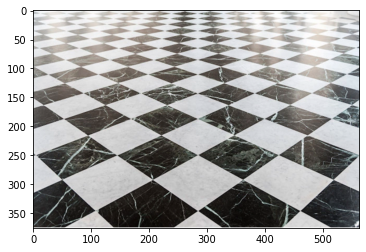

In [ ]:
im = load_image(imgPath)
plt.imshow(im)
plt.show()

2. Select 4 points so as they would correspond to a rectangle if there would be no projective distortion. Obtain corresponding 4 points on a rectangle.

The points are manually selected using **plt.ginput(4)** executed in the console. The first point the again is appened to be able to draw the rectangle.

In [ ]:
xx = [(54.080645161290306, 187.04516129032265), 
      (389.5241935483871, 74.47258064516132), 
      (540.7580645161289, 109.72258064516132), 
      (204.1774193548387, 290.5209677419356), 
      (54.080645161290306, 187.04516129032265)]

In [ ]:
def generate_GT(xx):
    plt.figure(2)

    #the part responsibe for the showing of the selected 4 points
    zzd = np.zeros((5, 3))   
    for ii in range(len(xx)-1):         
        x1 = xx[ii][0]
        y1 = xx[ii][1]
        zzd[ii, 0] = x1
        zzd[ii, 1] = y1
        zzd[ii, 2] = 1 
        plt.plot([xx[ii][0], xx[ii+1][0]], [xx[ii][1], xx[ii+1][1]], 'ro-') 

    #the part responsibe for the adjusting of the 4 points so as to obtain desired correspondence 
    jj = 0
    aa = [0, 0, 1, 0, 1, 3, 0, 3]
    zz = np.zeros((5, 3))  
    for ii in range(len(zzd)-1):
        zz[ii, 0] = zzd[aa[jj], 0] 
        zz[ii, 1] = zzd[aa[jj+1], 1] 
        zz[ii, 2] = 1   
        jj = jj + 2
    zz[4, :] = zz[0, :]
    for ii in range(4):      
        plt.plot([zz[ii, 0], zz[ii+1, 0]], [zz[ii, 1], zz[ii+1, 1]], 'go-')
    plt.show()

    return zz[0:4,:],zzd[0:4,:]  

**zzd** $-$ array of $x_{1}$, $x_{2}$, $x_{3}$ and $x_{4}$ (configuration on the projectively distorted image)

**zz** $-$ array of $x_{1}^{'}$, $x_{2}^{'}$, $x_{3}^{'}$ and $x_{4}^{'}$ (desired configuration)

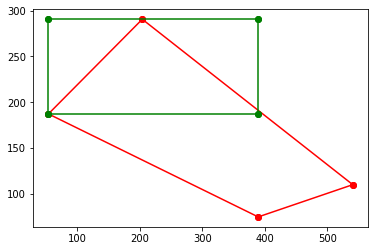

In [ ]:
zz, zzd = generate_GT(xx)

3. Compute four segments on the parallel sides of the tiles: two segments in one direction and two segments in the orthogonal direction, with respect to the scene, using the extreme points of the two segments build the four lines.

Given extreme points, we can define a line $l$ passing through them as a **cross-product.**

For the first pair of parallel segments:

$l_{1} = x_{1} \times x_{2}$, $l_{1}^{'} = x_{1}^{'} \times x_{2}^{'}$

$l_{2} = x_{3} \times x_{4}$, $l_{2}^{'} = x_{3}^{'} \times x_{4}^{'}$


For the second pair of parallel segments:

$l_{3} = x_{1} \times x_{4}$, $l_{3}^{'} = x_{1}^{'} \times x_{4}^{'}$


$l_{4} = x_{2} \times x_{3}$, $l_{4}^{'} = x_{2}^{'} \times x_{3}^{'}$



The funtion returns 4 lines normalized wrt $x_{3}(x_{3}^{'})$.

In [ ]:
def build_lines(points):
  lines = np.zeros((4, 3))
  lines[0] = np.cross(points[0], points[1])
  lines[1] = np.cross(points[2], points[3])
  lines[2] = np.cross(points[0], points[3])
  lines[3] = np.cross(points[1], points[2])
  print('lines:\n\n', lines)
  for i in range(len(lines)):
    lines[i] = lines[i] / lines[i][-1]
  print('\n normalized wrt x3 lines:\n\n', lines)
  return lines

GIVEN: 

**zzd_lines** $-$ array of $l_{1}$, $l_{2}$, $l_{3}$ and $l_{4}$ (configuration on the projectively distorted image)

DESIRED: 

**zz_lines** $-$ array of $l_{1}^{'}$, $l_{2}^{'}$, $l_{3}^{'}$ and $l_{4}^{'}$ (desired configuration)

In [ ]:
print("GIVEN\n")
zzd_lines = build_lines(zzd)
print("\nDESIRED\n")
zz_lines = build_lines(zz)

GIVEN

lines:

 [[ 1.12572581e+02  3.35443548e+02 -6.88310904e+04]
 [-1.80798387e+02 -3.36580645e+02  1.34698683e+05]
 [-1.03475806e+02  1.50096774e+02 -2.24788370e+04]
 [-3.52500000e+01  1.51233871e+02  2.46795117e+03]]

 normalized wrt x3 lines:

 [[-0.00163549 -0.00487343  1.        ]
 [-0.00134224 -0.00249877  1.        ]
 [ 0.00460325 -0.00667725  1.        ]
 [-0.0142831   0.06127912  1.        ]]

DESIRED

lines:

 [[     0.            335.44354839 -62743.09261186]
 [     0.           -335.44354839  97453.38430021]
 [  -103.47580645      0.           5596.03837149]
 [  -103.47580645      0.          40306.33005983]]

 normalized wrt x3 lines:

 [[-0.         -0.0053463   1.        ]
 [ 0.         -0.00344209  1.        ]
 [-0.0184909   0.          1.        ]
 [-0.00256723  0.          1.        ]]


4. Build the corresponding pair of **vanishing points** and use the vanishing points to compute the **vanishing line**.

***Def***:  Vanishing points are the projections of the ideal points in the image, at the intersection of the parallel lines.

***Def***:  Vanishing line is the projection of the line at infinity in the image.

Therefore, vanishing points can be computed as the cross-product between two parallel lines, and vanishing line $-$ as a cross_product between two vanishing points.

For the first vanishing point:

$vP_{x} = l_{1} \times l_{2}$

For the second vanishing point:

$vP_{y} = l_{3} \times l_{4}$

For the vanishing line:

$vL = vP_{x} \times vP_{y}$

The function implements listed computations and returns the result in the normalized wrt last coordinate form.

In [ ]:
def compute_vanishing(zzd_lines):
  vP_x = np.cross(zzd_lines[0], zzd_lines[1])
  vP_y = np.cross(zzd_lines[2], zzd_lines[3])

  vL = np.cross(vP_x, vP_y)
  return vP_x / vP_x[-1], vP_y / vP_y[-1], vL / vL[-1]


In [ ]:
vP_x, vP_y, vL = compute_vanishing(zzd_lines)
print(f"\n vanishing point vP_x: {vP_x} \n vanishing point vP_y: {vP_y} \n vanishing line vL: {vL}")


 vanishing point vP_x: [ 967.42628535 -119.46744338    1.        ] 
 vanishing point vP_y: [-363.96444606 -101.15259099    1.        ] 
 vanishing line vL: [1.29580495e-04 9.41980129e-03 1.00000000e+00]


5. Adapt **DLT** algorithm for the lines to obtain a homography.

First, we have to **normalize** lines (both on the projectively distorted image and on the rectangle) to avoid negative influence of the difference in the orders of the magnitude:

*   Translate the coordinates to the centre;
*   Scale the coordinates so that the average distance of a point from the centre is equal to $\sqrt2$;
*    Obtain the scaling matrix $S$;  
*    Apply $S^{-T}$, since we perform computations with the lines.





In [ ]:
def normalize_lines(zz):
    uu = zz.T
    ff_xx = np.ones(uu.shape)
    indices, = np.where(abs(uu[2, :]) > 10 ** -12)
    ff_xx[0:2, indices] = uu[0:2, indices] / uu[2, indices]
    ff_xx[2, indices]  = 1.

    # the mean of the points
    mu = np.mean(ff_xx[0:2, :], axis = 1)
    # the centre of the region extended to a vector
    mu_r = np.zeros((mu.shape[0], ff_xx.shape[1]))
    for ii in range(ff_xx.shape[1]):
        mu_r[:, ii] = mu
    # the average distance between Euclidian distances of each point from the centre of the region
    mu_dist = np.mean((np.sum((ff_xx[0:2] - mu_r) ** 2, axis = 0)) ** 0.5)

    # scaling values of S
    scale =  (2 ** 0.5 / mu_dist)
    # translation values of S
    s0 = -scale * mu[0]
    s1 = -scale * mu[1]
    # scaling matrix S
    S = np.array([[scale, 0, s0], [0, scale, s1], [0, 0, 1]])

    normalized_zz =  ((np.linalg.inv(S)).T) @ ff_xx
    return normalized_zz, S

Then, we **compute the matrix $A$** that is made by the stacked matrices $A_{i}, i = 1...4$ which are computed for each correspondence between the 4 chosen lines through the cross-product pushing out the vector $h$ of a matrix $H^{-T}$. So, we compute the same $A$ as for the points but will further take into consideration that null-vector of this matrix is not a null-vector of a matrix $H$.

P.S The third row of $A$ is removed since it is not linearly independent from the first two.

In [ ]:
def compute_A(uu, vv):
    # uu - lines on the rectangle, vv - original lines
    A = np.zeros((2 * (uu.shape[0] + 1), 9))
    jj = 0
    # compute 6 coefficients that are 3-dimensional vectors
    for ii in range(uu.shape[0] + 1):
        # a11 and a22
        a = (np.zeros((1, 3))[0])
        # a12       
        b = (-uu[2, ii] * vv[:, ii]) 
        # a13
        c =  uu[1, ii] * vv[:, ii]
        # a21
        d =  uu[2, ii] * vv[:, ii]
        # a23
        f =  (-uu[0, ii] * vv[:, ii])
        # combining together
        row1 = np.concatenate((a, b, c), axis = None)
        row2 = np.concatenate((d, a, f), axis = None)
        A[jj, :] = row1
        A[jj+1, :] = row2
        jj = jj + 2
    return A

Now we can find a 1D null-space of $A$ to obtain inversed and transposed homography $H^{-T}$ and **compute the final homography** $H$ as its inversion and transposition.

In [ ]:
def compute_homography(A, T1, T2):
    # use library function to compute null_space
    null_space_of_A = -scipy.linalg.null_space(A)
    # reshape from (9, 1) to (3, 3)
    reshaped_null_space = np.reshape(null_space_of_A, (3, 3)) 
    # considering that null-space was computed for lines
    hh_rescaled = np.linalg.inv(reshaped_null_space).T
    # denormalize solution
    hh = np.dot(np.linalg.inv(T2), np.dot(hh_rescaled, T1))
    return hh

Finally, found homography should be applied to the whole image, i.e. we need to do **remapping** (to map original image to the transformed one). That means, we need to sample points and multiply each of this sampled points using $H$.

With this purpose we are using *make_transform()* (which exploits *image_rebound()*) and *get_new_image()* functions.


In [ ]:
def rgb2gray(im):
    return np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

First of all, for remapping we need to understand what are the bounds of a new image.

In [ ]:
def image_rebound(mm, nn, hh):
    # the matrix of bounds of the original image: (1,1,1), (nn,1,1), (nn,mm,1) and (1,mm,1)
    W = np.array([[1, nn, nn, 1 ], [1, 1, mm, mm], [ 1, 1, 1, 1]])
    # multiply homography by the bound points
    ws = np.dot(hh, W)
    xx = np.vstack((ws[2, :], ws[2, :], ws[2,:]))
    wsX =  np.round(ws / xx)
    # compute minimum and maximum of the computed remapping
    bounds = [np.min(wsX[1, :]), np.max(wsX[1, :]), np.min(wsX[0, :]), np.max(wsX[0, :])]
    return bounds

Making the transform, we obtain the bounds, new rows and columns, transformation and inverse of the transformation which we finally use to get the image.

In [ ]:
def make_transform(im, hh):   
    mm, nn = im.shape[0], im.shape[1]
    bounds = image_rebound(mm, nn, hh)
    nrows = bounds[1] - bounds[0]
    ncols = bounds[3] - bounds[2]

    s = max(nn, mm) / max(nrows, ncols)
    scale = np.array([[s, 0, 0],[0, s, 0], [0, 0, 1]])

    transf = scale @ hh
    transf_prec =  np.linalg.inv(transf)
    bounds = image_rebound(mm, nn, transf)
    nrows = (bounds[1] - bounds[0]).astype(np.int)
    ncols = (bounds[3] - bounds[2]).astype(np.int)
    return bounds, nrows, ncols, transf, transf_prec

Last step is to reshape original image into a new one and display the result.

In [ ]:
def get_new_image(nrows, ncols, im, bounds, trasf_prec, nsamples):
    xx  = np.linspace(1, ncols, ncols)
    yy  = np.linspace(1, nrows, nrows)
    [xi, yi] = np.meshgrid(xx, yy) 
    a0 = np.reshape(xi, -1, order ='F') + bounds[2]
    a1 = np.reshape(yi, -1, order = 'F') + bounds[0]
    a2 = np.ones((ncols * nrows))
    uv = np.vstack((a0.T, a1.T, a2.T)) 
    new_trasf = np.dot(trasf_prec, uv)
    val_normalization = np.vstack((new_trasf[2, :], new_trasf[2, :], new_trasf[2, :]))
   
    # the new transformation
    newT = new_trasf / val_normalization
    
    # sampling
    xi = np.reshape(newT[0, :], (nrows, ncols), order ='F') 
    yi = np.reshape(newT[1, :], (nrows, ncols), order ='F')
    cols = im.shape[1]
    rows = im.shape[0]
    xxq  = np.linspace(1, rows, rows).astype(np.int)
    yyq  = np.linspace(1, cols, cols).astype(np.int)
    [x,y] = np.meshgrid(yyq, xxq) 
    # offsets
    x = (x - 1).astype(np.int) 
    y = (y - 1).astype(np.int) 
        
    ix = np.random.randint(im.shape[1], size = nsamples)
    iy = np.random.randint(im.shape[0], size = nsamples)
    samples = im[iy,ix]
    
    # interpolation
    int_im = griddata((iy, ix), samples, (yi, xi))
    
    # plotting
    fig = plt.figure(figsize=(10, 10))
    columns = 2
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(im, cmap='gray')
    fig.add_subplot(rows, columns, 2)
    plt.imshow(int_im.astype(np.uint8), cmap='gray')
    plt.show()

Function that forms transformation pipeline sequantially calling corresponding functions.

In [ ]:
def transform(im, zzd_lines, zz_lines):
  norm_lines_distorted, T1_norm = normalize_lines(zzd_lines)
  norm_lines, T2_norm = normalize_lines(zz_lines)
  A = compute_A(norm_lines, norm_lines_distorted)
  hh =  compute_homography(A, T1_norm, T2_norm)
  im = rgb2gray(im)
  bounds, nrows, ncols,  transf, transf_prec = make_transform(im, hh)
  # the number of samples that we have to choose from the image depends on the size of the image
  # for our image with size (376, 564) 1found nsamples is optimal tradeoff between the quality of the image and speed of execution of a script
  nsamples = 10 ** 6   
  get_new_image(nrows, ncols, im, bounds, transf_prec, nsamples)

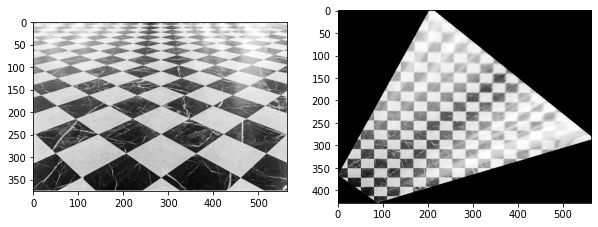

In [ ]:
im = load_image(imgPath)
transform(im, zzd_lines, zz_lines)

6. Verify that the last row of homography $H$ is a vanishing line $l$.

In [ ]:
print(f"Homography H:\n\n {hh} \n\nLast row of the homography homogenized: \n\n {hh[-1] / hh[-1][-1]} \
\n\nVanishing line l: \n\n {vL} \n\nResult of the verification (by coordinates): {np.round(hh[-1] / hh[-1][-1], 10) == np.round(vL, 10)}")

Homography H:

 [[ 6.13529850e+03 -6.21022624e+03  1.60485005e+06]
 [ 4.52175866e+03  2.22195468e+04 -1.71995573e+06]
 [ 6.70685859e-01  4.87552353e+01  5.17582418e+03]] 

Last row of the homography homogenized: 

 [1.29580495e-04 9.41980129e-03 1.00000000e+00] 

Vanishing line l: 

 [1.29580495e-04 9.41980129e-03 1.00000000e+00] 

Result of the verification (by coordinates): [ True  True  True]


7. Verify that $H^{-T}l^{T}$ results in the line at infinity $(0,0,1)^{T}$.

In [ ]:
l = np.dot(np.linalg.inv(hh).T, vL)
print(f"Result of the homography applied to the vanishing line: {np.round(l/l[-1])} \
\n\nResult of the verification (by coordinates): {np.round(l/l[-1]) == np.array([0.,0.,1.])}")

Result of the homography applied to the vanishing line: [-0.  0.  1.] 

Result of the verification (by coordinates): [ True  True  True]


8. Apply $H_{p}$ to the image to obtain image where tiles are parallel.

A homography $H$ is defined as $H = H_{A}H_{P}$, 

where $H_{P}$ is a projective transformation of a form: $$H_{p} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ l_{1} &l_{2} & l_{3} \end{bmatrix}$$ with $l = (l_{1}, l_{2}, l_{3}) - $ vanishing line, 

and $H_{A} - $ affine transformation.

Therefore, let's construct $H_{P}$ of a given form, find $H_{A}$ as $H_{A} = HH_{P}^{-1}$ ($H_{P}$ is invertible) and verify that $H_{A}$ is an affine transformation.

In [ ]:
# builf Hp
hp = np.array([[1,0,0],[0,1,0],vL])
# compute Ha
ha = (hh / hh[-1][-1]) * np.linalg.inv(hp)
print(f"Hp:\n\n {hp} \n\nHa:\n\n {ha} \n\nHa rounded:\n\n {np.round(ha)}")

Hp:

 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.29580495e-04 9.41980129e-03 1.00000000e+00]] 

Ha:

 [[ 1.18537614e+00 -0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.29294854e+00 -0.00000000e+00]
 [-1.67911047e-08 -8.87326563e-05  1.00000000e+00]] 

Ha rounded:

 [[ 1. -0.  0.]
 [ 0.  4. -0.]
 [-0. -0.  1.]]


Correct matrix $H_{A}$ should be of a form: $$H_{A} = \begin{bmatrix} A & t \\ 0^{T} & 1  \end{bmatrix}$$ where $A$ is a non-singular (this condition is satisfied) part represented by rotation and scaling (scaling and shear), 

and $t - $ translation.

As we can see, $H_{A}$ takes a correct form, but let's also explicitly show that: 

1) if $H_{A}$ is an affine transformation then the line at infinity is mapped to the line at infinity: $H_{A}^{-T}l_{inf} = l_{inf}$;

2) $H_{A}$ is an affine transformation, but not an isometry/similarity.

In [ ]:
# 1)
l_inf = np.dot(np.round(np.linalg.inv(ha).T), np.round((l/l[-1])))
print(f"Result of the affine transformation applied to the line at infinity: {l_inf} \
\n\nResult of the verification (by coordinates): {l_inf == np.array([0.,0.,1.])}")

Result of the affine transformation applied to the line at infinity: [0. 0. 1.] 

Result of the verification (by coordinates): [ True  True  True]


To check that $H_{A}$ is not an isometry/similarity, we have to verify that its $A$ part does not satisfy to equality: $A^{T}A = I$.

In [ ]:
A = ha[:2,:2]
print(f"Result of the multiplication: \n\n {A.T@A}")
print("\nObviously, is not equal to identity matrix I.")

Result of the multiplication: 

 [[ 1.4051166   0.        ]
 [ 0.         18.42940715]]

Obviously, is not equal to identity matrix I.


Now, when we are sure, that all computation are made correctly, let's apply $H_{P}$ to the image and plot the result.

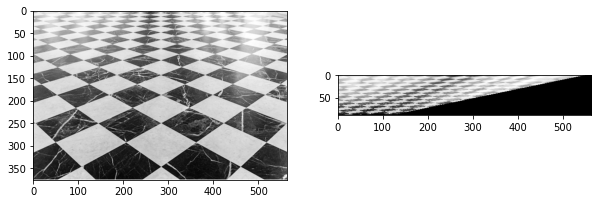

In [ ]:
im = load_image(imgPath)
im = rgb2gray(im)
bounds, nrows, ncols,  transf, transf_prec = make_transform(im, hp)
get_new_image(nrows, ncols, im, bounds, transf_prec, nsamples)  

Tiles are parallel in the right image as it was expected.

8. Have we obtained a metric rectification after the wrapping? If not what would we need?

Let's compare two images that we have already plotted before and analyze them (represented at the right sight).

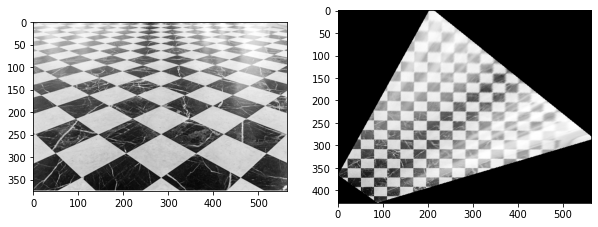

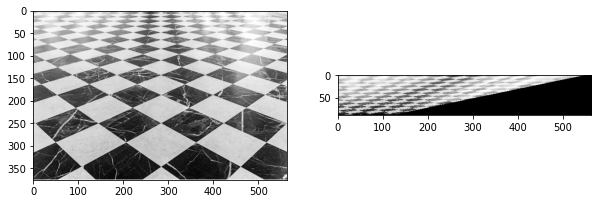

In [ ]:
im = load_image(imgPath)
transform(im, zzd_lines, zz_lines)
im = rgb2gray(im)
bounds, nrows, ncols,  transf, transf_prec = make_transform(im, hp)
get_new_image(nrows, ncols, im, bounds, transf_prec, nsamples)  

Where affine properties are recovered by specifying $l_{inf}$, enables metric properties to be recovered from an image of a plane by transforming the circular points to their canonical position. Supposing the circular points are identified in an image, and the image is then rectified
by a projective transformation, the transformation between the world
plane and the rectified image is then a **similarity**.

The dual conic $C_{inf}^{*}$ packages all the information
required for a metric rectification. It enables both the projective and affine components of a projective transformation to be determined, leaving only similarity distortions:

$C_{inf}^{*'} = (H_{P}H_{A}H_{S})C_{inf}^{*}(H_{P}H_{A}H_{S})^{T} = (H_{P}H_{A})H_{S}C_{inf}^{*}H_{S}^{T}(H_{P}H_{A})^{T} = (H_{P}H_{A})C_{inf}^{*}(H_{P}H_{A})^{T}$.

Therefore, we need $C_{inf}^{*}$, and it may be identified in an image, and thence a metric rectification obtained.

Assuming an image has been affinely rectified, then we require
two constraints to specify the $2$ DoF of the circular points in order
to determine a metric rectification. These two constraints may be obtained from two imaged right angles on the world plane.

When we have lines $l^{'}, m^{'}$ in the affinely rectified image that correspond to an orthogonal line pair $l,m$ on the world plane, we can write for them $l^{'T}C_{inf}^{*'} m^{'} = 0$ with the $$C_{inf}^{*'} = \begin{bmatrix} KK^{T} & 0 \\ 0^{T} & 0  \end{bmatrix}$$ which is a linear constraint on the $2 \times 2$ symmetric with three independent elements (2 DoF) matrix $S = KK^{T}$.

The orthogonality condition reduces the equation and so, two orthogonal line pairs provide two constraints which may be stacked to give a $2 \times 3$ matrix with a null-vector that helps to compute $S$, and hence $K$ up to scale.

In this exercise we had such two orthogonal line pairs. In the first case (the case of top right result), we obtained affinely rectified image and actually performed all described steps of an algorithm for achieving metric rectification afterwords. Meanwhile, in the second case (the bootm right), we just transformed image using $H_{P}$. Consequently, in the first case metric rectification is obtained (e.g. orthogonality of lines) and in the second one $-$ no.

#**Exercise 3**#

1. Show that the ratio of length of parallel line segments is preserved.


**a)**  We have to define two lines $l_{1}$ and $l_{2}$, s.t. $l_{1}$ || $l_{2}$.


 We know, that if two lines are parallel, then they meet at the point at infinity:
 
 $l_{1} \times l_{2} = (x_{1}, x_{2}, x_{3})$, where $x_{3} = 0$.

 Therefore, if $l_{1} = (a, b, c)$ and $l_{2} = (d, e, f)$, then 
 
 $$l_{1} \times l_{2} = \begin{bmatrix} bf - ce \\ cd - af \\ ae - bd  \end{bmatrix}$$

 and we essentially require $ae - bd = 0$.


In [ ]:
# for example, let's pick a = 2, e = 3, b = 1, d = 6
a = 2
e = 3
b = 1
d = 6
x3 = a*e - b*d
print(f"x3 = {x3}\n")
# c and f are any, let's pick them equal to 1
l1 = np.array([2, 1, 1])
l2 = np.array([6, 3, 1])
print(f"l1 = {l1}")
print(f"l2 = {l2}\n")
print(f"Cross-product between l1 and l2 is equal to {np.cross(l1, l2)}")

x3 = 0

l1 = [2 1 1]
l2 = [6 3 1]

Cross-product between l1 and l2 is equal to [-2  4  0]


**b)** The next step is to define two segments (two points on each line).

 For the first line let's take points $x$ and $x^{'}$, s.t. 
 
 $x^{T}l_{1} = l_{1}^{T}x = 0$ and $x^{'T}l_{1} = l_{1}^{T}x^{'} = 0$.

 Analogously, for the second line let's choose points $y$ and $y^{'}$, s.t. 
 
 $y^{T}l_{2} = l_{2}^{T}y = 0$ and $y^{'T}l_{2} = l_{2}^{T}y^{'} = 0$.

In [ ]:
# pick points satisfying the above equations (belonging to the corresponding lines)
x = np.array([-1, 1, 1])
x_prime = np.array([-0.5, 0, 1])

y = np.array([-1/6, 0, 1])
y_prime = np.array([5/6, -2, 1])

print(f"scalar product of x transposed and l1: {np.dot(x, l1)}\n\
scalar product of x_prime transposed and l1 : {np.dot(x_prime, l1)}\n\
scalar product of y transposed and l2: {np.dot(y, l2)}\n\
scalar product of y_prime transposed and l2 : {np.dot(y_prime, l2)}")

scalar product of x transposed and l1: 0
scalar product of x_prime transposed and l1 : 0.0
scalar product of y transposed and l2: 0.0
scalar product of y_prime transposed and l2 : 0.0


**c)** Now we can compute the distances.

 For the first segment, distance $D_{1} = (x^{'} - {x})^{T}(x^{'} - {x})$ (formula does not include the square root, because we can always extract it, but to compute the ratio it is completely ueless).

 For the second segment, distance $D_{2} = (y^{'} - {y})^{T}(y^{'} - {y})$.


In [ ]:
D1 = np.dot((x_prime - x), (x_prime - x))
D2 = np.dot((y_prime - y), (y_prime - y))
print(f"D1 = {D1}\nD2 = {D2}")

D1 = 1.25
D2 = 5.0


 **d)** Then we need to introduce an affine transformation $$H_{A} = \begin{bmatrix} A & t \\ 0^{T} & 1  \end{bmatrix}$$ where $$A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}  \end{bmatrix}$$, $$t = \begin{bmatrix} t_{1} \\ t_{2}  \end{bmatrix}$$ and $0^{T} = [0, 0]$.

 We need to take care that this matrix is **effectively** an affine transformation, i.e. an affine transformation, but not an isometry.


In [ ]:
# for example, to effectively achieve an affine transformation we can choose A as an identity, but with the scaling and shear 
A = np.array([[4, 0.15],[0, 4]]) # non-singular
# to check that H_A with this A will not produce isometry transformation we need to multiply A transposed by A and get something not equivalent to I
print(f"A.T @ A:\n\n{A.T @ A}\n")
# since we get appropriate A we can build H_A as described, where translation might be any
H_A = np.array([[A[0][0], A[0][1], 0.2], [A[1][0], A[1][1], 0.9], [0, 0, 1]])
print(f"Affine tranformation H_A: \n\n{H_A}")

A.T @ A:

[[16.      0.6   ]
 [ 0.6    16.0225]]

Affine tranformation H_A: 

[[4.   0.15 0.2 ]
 [0.   4.   0.9 ]
 [0.   0.   1.  ]]


 **e)** Once an affine transformation has been obtained, we can compute $x^{*}$, $x^{'*}$, $y^{*}$ and $y^{'*}$:

$x^{*} = H_{A}x$,  $x^{'*} = H_{A}x^{'}$

$y^{*} = H_{A}y$,  $y^{'*} = H_{A}y^{'}$.

New distances, correspondingly, will be $D_{1}^{*} = (x^{'*} - x_{*})^{T}(x^{'*} - x^{*})$ and $D_{2}^{*} = (y^{'*} - y^{*})^{T}(y^{'*} - y^{*})$.



In [ ]:
# new points
x_star = np.matmul(H_A, x)
x_prime_star = np.matmul(H_A, x_prime)

y_star = np.matmul(H_A, y)
y_prime_star = np.matmul(H_A, y_prime)

# new distances
D1_star = np.dot((x_prime_star - x_star), (x_prime_star - x_star))
D2_star = np.dot((y_prime_star - y_star), (y_prime_star - y_star))
print(f"D1_new = {D1_star}\nD2_new = {D2_star}")

D1_new = 19.4225
D2_new = 77.69


**f)** Now we are left only to check that $\frac{D_{1}}{D_{2}} = \frac{D_{1}^{*}}{D_{2}^{*}}$.

In [ ]:
print(f"First ratio: {D1/D2}")
print(f"Second ratio: {D1_star/D2_star}")
print(f"\nIs equal? {D1/D2 == D1_star/D2_star}")

First ratio: 0.25
Second ratio: 0.25

Is equal? True


2. Show that a circle can be computed using 3 points plus the two circular points.

In $\mathbb{P^2}$ the equation of the conic in the homogeneous coordinates is

$ax_{1}^{2} + bx_{1}x_{2} + cx_{2}^{2} + dx_{1}x_{3} + ex_{2}x_{3} + fx_{3}^{2} = 0$.

By definition, for a circle $a = c$ and $b = 0$, and therefore above equation transforms in the form:

$ax_{1}^{2} + ax_{2}^{2} + dx_{1}x_{3} + ex_{2}x_{3} + fx_{3}^{2} = 0$, which we can write in the matrix form as 

$$[x_{1}, x_{2}, x_{3}]^{T}\begin{bmatrix} a & 0 & \frac{d}{2} \\ 0 & a & \frac{e}{2} \\ \frac{d}{2} & \frac{e}{2} & f \end{bmatrix} \begin{bmatrix} x_{1} \\ x_{2} \\ x_{3} \end{bmatrix} = 0$$.

Now if we draw a line at infinity, then the circle will meet this line at the (two) points at infinity that have $x_{3} = 0$. In the projective space $\mathbb{P^2}$ the circle always meet the line at infinity at $2$ points. When we replace in the equation of a circle $x_{3} = 0$ and $a = 1$, we get:

$x_{1}^{2} + x_{2}^{2} = 0$, and this equation has two solutions: 

$x_{1} = -x_{2}i $ and $ x_{1} = x_{2}i $, where $i = -\sqrt{1}$. 

These two solutions are exactly the two points at infinity: 

$I = (1, i, 0)^{T}$ and $J = (1, -i, 0)^{T}$. They are called **circular points**, are left invariant by any similarity transformation and allow to recover orthogonal directions in an image.

Looking at the things by another way round, if we start from equation of a conic: $ax_{1}^{2} + bx_{1}x_{2} + cx_{2}^{2} + dx_{1}x_{3} + ex_{2}x_{3} + fx_{3}^{2} = 0$, and the conic contains the circular points $I = (1, i, 0)^{T}$ and $J = (1, -i, 0)^{T}$, we get the two equations:

$a - c - ib = 0$ and $a - c + ib = 0$, 

from which we get: 

$2ib = 0$ and $a = c$, 

that is, $b = 0$ and $a = c$. 

The resulting equation $ax_{1}^{2} + ax_{2}^{2} + dx_{1}x_{3} + ex_{2}x_{3} + fx_{3}^{2} = 0$ is indeed that of a circle.

Now $$C = \begin{bmatrix} a & 0 & \frac{d}{2} \\ 0 & a & \frac{e}{2} \\ \frac{d}{2} & \frac{e}{2} & f \end{bmatrix}$$ declares $3$ DoF: {$a:d:e:f$}.

So, other than $2$ circular points, we need $3$ more points to compute a circle.
 
For each point circle passes through $(x_{i}^{2} + y_{i}^{2}, x_{i}, y_{i}, 1)c = 0, c = (a, d, e, f)^{T}$.

Stacking constraints yields: 

$$\begin{bmatrix} x_{1}^{2} + y_{1}^{2} & x_{1} & y_{1} & 1 \\x_{2}^{2} + y_{2}^{2} & x_{2} & y_{2} & 1 \\ x_{3}^{2} + y_{3}^{2} & x_{3} & y_{3} & 1 \end{bmatrix}c = 0$$.

Stacked matrix has a rank $3$ and, finally, we can compute a circle $c$ as a one-dimensional null-space of this matrix.





In [ ]:
np.random.seed(103)

# generate 3 points
p1 = np.random.randint(10, size = 3) 
p1 = p1 // p1[-1]
p2 = np.random.randint(10, size = 3)
p2 = p2 // p2[-1]
p3 = np.random.randint(10, size = 3)
p3 = p3 // p3[-1]
print(f"\n p1: {p1} \n p2: {p2} \n p3: {p3}")

# form a stacked matrix P
P = np.vstack(([p1[0]**2+p1[1]**2, p1[0], p1[1], 1], 
               [p2[0]**2+p2[1]**2, p2[0], p2[1], 1], 
               [p3[0]**2+p3[1]**2, p3[0], p3[1], 1]))
print(f"\nStacked points to compute circle: \n\n {P}")

# compute circular coefficients
c = scipy.linalg.null_space(P)
print(f"\n (a, d, e, f): \n\n {c}")

# check that null-space is computed correctly
print(f"\nCheck the correctness: \n\n If p1 belong to c? {np.round(np.dot(P[0], c))==0}\
\n If p2 belong to c? {np.round(np.dot(P[1], c))==0} \n If p3 belong to c? {np.round(np.dot(P[2], c))==0}")


 p1: [2 3 1] 
 p2: [9 6 1] 
 p3: [0 1 1]

Stacked points to compute circle: 

 [[ 13   2   3   1]
 [117   9   6   1]
 [  1   0   1   1]]

 (a, d, e, f): 

 [[-0.03201332]
 [ 0.68828639]
 [-0.49620646]
 [ 0.52821979]]

Check the correctness: 

 If p1 belong to c? [ True]
 If p2 belong to c? [ True] 
 If p3 belong to c? [ True]


#**Exercise 2**#


Implement a simple calibration device using algirithm in the **Example 8.18** of the R.Hartley and A.Zisserman book.

1. Load the image of three squares (on planes which are not parallel, but which need not be orthogonal) that provides sufficiently many constraints to compute the calibration matrix $K$.

Image path.


In [ ]:
imgPath = 'planes.png'

Use PIL to open image path and load an image as a numpy array.

In [ ]:
def load_image(im):  
    try:
        imx = Image.open(im)
        return np.array(imx)
    except IOError:
        return []

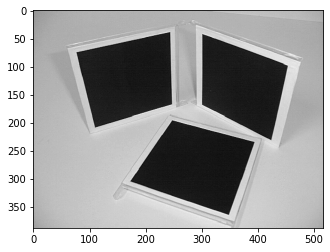

In [ ]:
im = load_image(imgPath)
plt.imshow(im, cmap='gray')
plt.show()

2. For each square **compute the homography** $H$ that maps its corner points to their imaged points.

First, we extract $4$ points for each square using **plt.ginput()** function in the console regime as for the Exersice 2.

Array $xx$ includes all $12$ corner points, where the first $4$ correspond to the top left square, the second $4 -$ to the top right square, and the last $4 -$ to the bottom one.  


In [ ]:
xx = [(77.34366761058487, 73.90992090616157), 
      (242.53066106825503, 38.29621130748956), 
      (247.0770920808514, 165.59627966018945), 
      (109.92642320085923, 207.2718972756567),
      (300.87652572990913, 41.32716531588716),
      (452.42422614979006, 98.15755297334249),
      (422.87242456791324, 228.48857533444001),
      (300.87652572990913, 167.11175666438828),
      (247.83483058295081, 195.14808124206624),
      (391.8051459818377, 233.03500634703644),
      (347.09857435797284, 361.8505517039352),
      (173.57645737720924, 303.50468704228103)]

Visualize chosen points on the image.

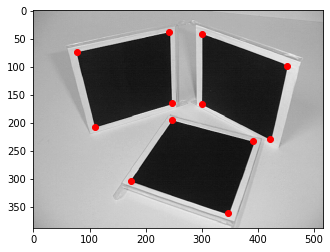

In [ ]:
x = np.zeros(len(xx))
y = np.zeros(len(xx))
for ii in range(len(xx)):
  x[ii] = xx[ii][0]
  y[ii] = xx[ii][1]

plt.imshow(im, cmap='gray')
plt.plot(x, y, 'o', color='red');

Now we can find a homography $H$ for each square using **OpenCV method findHomography** that finds a perspective transformation between two planes: source points are $(0, 0)^{T}, (1, 0)^{T}, (0, 1)^{T}, (1, 1)^{T}$, destination points are corners of the square.

In [ ]:
def compute_homography(dst_pts):

  # source points in the appropriate order
  src_pts = [(0, 0), (1, 0), (1, 1), (0, 1)]
  
  # reformatting required to apply findHomography
  src_pts = np.float32([i for i in src_pts]).reshape(-1,1,2)
  dst_pts = np.float32([i for i in dst_pts]).reshape(-1,1,2)

  # cv2.RANSAC - RANSAC-based robust method to compute a homography matrix
  # 5.0 - maximum allowed reprojection error to treat a point pair as an inlier in the RANSAC
  H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

  return H

In [ ]:
H1 = compute_homography(xx[0:4])
H2 = compute_homography(xx[4:8])
H3 = compute_homography(xx[8:12])
print(f"COMPUTED HOMOGRAPHIES\n\n H1:\n\n {np.round(H1)}\n\n H2:\n\n {np.round(H2)}\n\n H3:\n\n {np.round(H3)}")

COMPUTED HOMOGRAPHIES

 H1:

 [[193.  55.  77.]
 [-31. 175.  74.]
 [  0.   0.   1.]]

 H2:

 [[ 91.  63. 301.]
 [ 44. 161.  41.]
 [ -0.   0.   1.]]

 H3:

 [[ 115. -107.  248.]
 [  21.   51.  195.]
 [  -0.   -0.    1.]]


3. Find the image of absolute conic $w$.

Given  homography $H$, we can compute the imaged circular points for the plane of that square as $H(1, ±i, 0)^{T}$. Rewriting in a column form: $H = [h_1, h_2, h_3]$, the imaged circular points are $h_1 ± ih_2$. 

As we know, the conic $w$ can be represented in the form of matrix of its coefficients with $6$ unknowns ($5$ DoF), and we can fit this conic to the $6$ imaged circular points. The constraint that the imaged circular points lie on $ω$ may be rewritten as two real constraints: if $h_1 ± ih_2$
lies on $ω$ then $(h_1 ± ih_2)^Tω(h_1 ± ih_2) = 0$, and the imaginary and real parts give respectively linear in $w$ equations: 

$h^T_1ωh_2 = 0$ and $h^T_1ωh_1 = h^T_2ωh_2$.

The conic $ω$ is determined up to scale from five or more such equations. So, let's form the corresponding system of linear equations $Aw = 0$ and solve it for the unknown $w = (a, b, c, d, e, f)^T$.

First, we can expand the equation $h^T_1ωh_2 = 0$ as 

$$[h_{11}, h_{12}, h_{13}]^{T}\begin{bmatrix} a & \frac{b}{2} & \frac{d}{2} \\ \frac{b}{2} & c & \frac{e}{2} \\ \frac{d}{2} & \frac{e}{2} & f \end{bmatrix} \begin{bmatrix} h_{21} \\ h_{22} \\ h_{23} \end{bmatrix} = 0$$. 

Now, performing all of the necessary matrix multiplications, we get an equation:

$ah_{11}h_{21} + \frac{b}{2}(h_{12}h_{21} + h_{11}h_{22}) + ch_{12}h_{22} + \frac{d}{2}(h_{13}h_{21} + h_{11}h_{23}) + \frac{e}{2}(h_{13}h_{22} + h_{12}h_{23}) + fh_{13}h_{23} = 0$. 

And therefore, $a_1 -$ the first row of a matrix $A$ formed by elements of matrix $H_1$: 

$a_1 = (2h_{11}h_{21}, h_{12}h_{21} + h_{11}h_{22}, 2h_{12}h_{22}, h_{13}h_{21} + h_{11}h_{23}, h_{13}h_{22} + h_{12}h_{23}, 2h_{13}h_{23})^T$.

Analogically $a_2$ and $a_3$ can be computed, given homographies $H_2$ and $H_3$.

In [ ]:
def get_row_of_the_first_type(h1, h2):
  a = np.zeros(6)
  a[0] = 2*h1[0]*h2[0]
  a[1] = h1[1]*h2[0] + h1[0]*h2[1]
  a[2] = 2*h1[1]*h2[1]
  a[3] = h1[2]*h2[0] + h1[0]*h2[2]
  a[4] = h1[2]*h2[1] + h1[1]*h2[2]
  a[5] = 2*h1[2]*h2[2]
  return a

Now we can also expand the equation $h^T_1ωh_1 = h^T_2ωh_2$.

Since we know the standard equation of the conic lloks like $ax_{1}^{2} + bx_{1}x_{2} + cx_{2}^{2} + dx_{1}x_{3} + ex_{2}x_{3} + fx_{3}^{2} = 0$, we can just substitute it with $h_1$ and $h_2$ and then distract one from the another. In the result, we obtain equation:

$a(h_{11}^2 - h_{21}^2) + b(h_{12}h_{11} - h_{21}h_{22}) + c(h_{12}^2 - h_{22}^2) + d(h_{13}h_{11} - h_{21}h_{23}) + e(h_{13}h_{12} - h_{22}h_{23}) + f(h_{13}^2 - h_{23}^2) = 0$. 

And therefore, $a_4, a_5$ and $a_6$ in the matrix $A$ can be computed as: 

$(h_{11}^2 - h_{21}^2, h_{12}h_{11} - h_{21}h_{22}, h_{12}^2 - h_{22}^2, h_{13}h_{11} - h_{21}h_{23}, h_{13}h_{12} - h_{22}h_{23}, h_{13}^2 - h_{23}^2)^T$, given homographies $H_1$, $H_2$ and $H_3$, respectively.

In [ ]:
def get_row_of_the_second_type(h1, h2):
  a = np.zeros(6)
  a[0] = h1[0]**2 - h2[0]**2
  a[1] = h1[1]*h1[0] - h2[0]*h2[1]
  a[2] = h1[1]**2 - h2[1]**2
  a[3] = h1[2]*h1[0] - h2[0]*h2[2]
  a[4] = h1[2]*h1[1] - h2[1]*h2[2]
  a[5] = h1[2]**2 - h2[2]**2
  return a

Colllecting everything together, we can build now the matrix $A$ and compute $w$.

In [ ]:
def build_A(H1, H2, H3):
  A = np.zeros((6, 6))
  A[0] = get_row_of_the_first_type(H1[:, 0], H1[:, 1])
  A[1] = get_row_of_the_first_type(H2[:, 0], H2[:, 1])
  A[2] = get_row_of_the_first_type(H3[:, 0], H3[:, 1])
  A[3] = get_row_of_the_second_type(H1[:, 0], H1[:, 1])
  A[4] = get_row_of_the_second_type(H2[:, 0], H2[:, 1])

  return A

In [ ]:
def get_w(H1, H2, H3):
  A = build_A(H1, H2, H3)
  w = scipy.linalg.null_space(A)
  return w

In [ ]:
w = get_w(H1, H2, H3)
print(f"Coefficients of IAC (a, b, c, d, e, f): \n {tuple(np.round(w, 10).reshape(-1))}")

Coefficients of IAC (a, b, c, d, e, f): 
 (2.4682e-06, 2.312e-07, 2.2107e-06, -0.0015689012, -0.0007588615, 0.9999984813)


4. Compute the calibration $K$ from $ω = (KK^T)^{−1}$ using the **Cholesky factorization**.


First, we need represent $w$ in the form of $3 \times 3$ matrix:

$$w = \begin{bmatrix} a & \frac{b}{2} & \frac{d}{2} \\ \frac{b}{2} & c & \frac{e}{2} \\ \frac{d}{2} & \frac{e}{2} & f \end{bmatrix}$$. 


In [ ]:
def build_W(w):

  W = np.zeros((3, 3))

  W[0][0] = w[0]
  W[0][1] = w[1] / 2
  W[0][2] = w[3] / 2
  W[1][0] = W[0][1]
  W[1][1] = w[2]
  W[1][2] = w[4] / 2
  W[2][0] = W[0][2]
  W[2][1] = W[1][2]
  W[2][2] = w[5]

  return W

Now, considering the formula $ω = (KK^T)^{−1}$, to get calibration matrix $K$ we need to apply Cholesky factorization to the inverse of built matrix $W$.

In [ ]:
def compute_K(w):

  W = build_W(w)
  return scipy.linalg.cholesky(np.linalg.inv(W))


In [ ]:
K = compute_K(w)
import pandas as pd
print(f"COMPUTED CALIBRATION MATRIX\n\n K:\n\n {K}")

COMPUTED CALIBRATION MATRIX

 K:

 [[7.37845437e+02 6.49847554e+01 6.03461444e-01]
 [0.00000000e+00 6.95595600e+02 2.63930777e-01]
 [0.00000000e+00 0.00000000e+00 1.00000076e+00]]
